## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [15]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [16]:
train, test = keras.datasets.cifar10.load_data()

In [17]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [18]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [21]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0726 13:47:23.665802 10876 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



Experiment with LR = 0.100000


W0726 13:47:24.004290 10876 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 13:47:24.315221 10876 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0726 13:47:25.941374 10876 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 290us/step - loss: 12.2855 - acc: 0.1037 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 103us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 103us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 5s 102us/step - loss: 1.8275 - acc: 0.3464 - val_loss: 1.6818 - val_acc: 0.4026
Epoch 2/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6030 - acc: 0.4306 - val_loss: 1.5465 - val_acc: 0.4524
Epoch 3/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.5066 - acc: 0.4652 - val_loss: 1.5628 - val_acc: 0.4436
Epoch 4/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.4410 - acc: 0.4868 - val_loss: 1.4771 - val_acc: 0.4749
Epoch 5/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.3988 - acc: 0.5047 - val_loss: 1.4458 - val_acc: 0.4880
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3604 - acc: 0.5154 - val_loss: 1.4670 - val_acc: 0.4750
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.3266 - acc: 0.5281 - val_loss: 1.3871 - val_acc: 0.5094
Epoch 8/50
50000/50000 [===========================

50000/50000 [==============================] - 6s 117us/step - loss: 1.8063 - acc: 0.3663 - val_loss: 1.7544 - val_acc: 0.3864
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7130 - acc: 0.3973 - val_loss: 1.6812 - val_acc: 0.4127
Epoch 4/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.6518 - acc: 0.4181 - val_loss: 1.6237 - val_acc: 0.4334
Epoch 5/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6062 - acc: 0.4353 - val_loss: 1.5920 - val_acc: 0.4353
Epoch 6/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5680 - acc: 0.4494 - val_loss: 1.5652 - val_acc: 0.4480
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.5356 - acc: 0.4605 - val_loss: 1.5442 - val_acc: 0.4546
Epoch 8/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.5068 - acc: 0.4703 - val_loss: 1.5196 - val_acc: 0.4588
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 97us/step - loss: 2.0371 - acc: 0.2835 - val_loss: 2.0083 - val_acc: 0.2977
Epoch 4/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9848 - acc: 0.3034 - val_loss: 1.9653 - val_acc: 0.3113
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9465 - acc: 0.3192 - val_loss: 1.9320 - val_acc: 0.3237
Epoch 6/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.9159 - acc: 0.3293 - val_loss: 1.9052 - val_acc: 0.3340
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.8905 - acc: 0.3389 - val_loss: 1.8843 - val_acc: 0.3426
Epoch 8/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8691 - acc: 0.3461 - val_loss: 1.8638 - val_acc: 0.3492
Epoch 9/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.8508 - acc: 0.3527 - val_loss: 1.8492 - val_acc: 0.3566
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 5s 96us/step - loss: 2.2359 - acc: 0.1550 - val_loss: 2.2264 - val_acc: 0.1675
Epoch 5/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.2202 - acc: 0.1777 - val_loss: 2.2117 - val_acc: 0.1805
Epoch 6/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.2061 - acc: 0.1891 - val_loss: 2.1985 - val_acc: 0.1960
Epoch 7/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1933 - acc: 0.2029 - val_loss: 2.1862 - val_acc: 0.2118
Epoch 8/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1815 - acc: 0.2146 - val_loss: 2.1747 - val_acc: 0.2215
Epoch 9/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.1704 - acc: 0.2218 - val_loss: 2.1638 - val_acc: 0.2299
Epoch 10/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1600 - acc: 0.2298 - val_loss: 2.1535 - val_acc: 0.2360
Epoch 11/50
50000/50000 [==========================

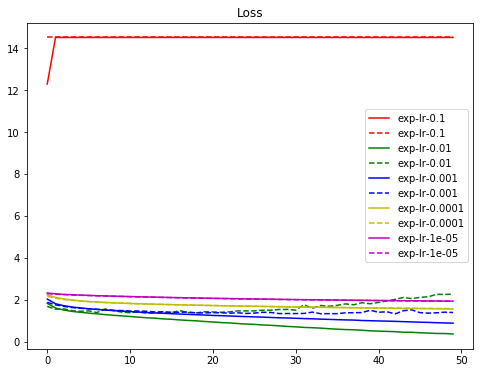

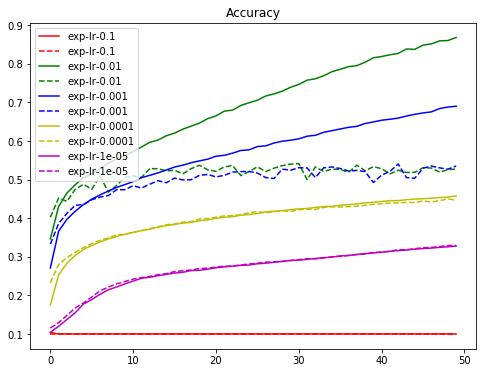

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()